In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
import math

warnings.filterwarnings("ignore")

In [3]:
from nltk.corpus import stopwords

In [4]:
# known 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, normalized_mutual_info_score
from sklearn.metrics.classification import accuracy_score, log_loss

# unknown
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.calibration import CalibratedClassifierCV

In [5]:
from scipy.sparse import hstack
from collections import Counter, defaultdict

In [6]:
from imblearn.over_sampling import SMOTE
from mlxtend.classifier import StackingClassifier

In [7]:
data_text = pd.read_csv("F:/semicolon_Deep_Learning/training_text",sep="\|\|", engine="python", names=["ID","TEXT"],skiprows=1)

In [8]:
#pd.set_option('display.max_columns', 2)


In [9]:
data_text.head(37)

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...
5,5,Oncogenic mutations in the monomeric Casitas B...
6,6,Oncogenic mutations in the monomeric Casitas B...
7,7,CBL is a negative regulator of activated recep...
8,8,Abstract Juvenile myelomonocytic leukemia (JM...
9,9,Abstract Juvenile myelomonocytic leukemia (JM...


In [26]:
# pd.reset_option('display.max_columns')

In [10]:
data_variants = pd.read_csv("F:/semicolon_Deep_Learning/training_variants")

In [11]:
data_variants.head(30)

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4
5,5,CBL,V391I,4
6,6,CBL,V430M,5
7,7,CBL,Deletion,1
8,8,CBL,Y371H,4
9,9,CBL,C384R,4


In [12]:
print(data_text.shape)
print(data_variants.shape)

(3321, 2)
(3321, 4)


In [13]:
for gene in data_variants['Class'].unique():
    print(gene)
    


1
2
3
4
5
6
7
8
9


In [14]:
# no of unique Variation in data_variants
len(data_variants['Variation'].unique())

2996

In [15]:
# no of unique Variation in data_variants
len(data_variants['Gene'].unique())

264

In [16]:
data_variants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 4 columns):
ID           3321 non-null int64
Gene         3321 non-null object
Variation    3321 non-null object
Class        3321 non-null int64
dtypes: int64(2), object(2)
memory usage: 103.9+ KB


In [17]:
data_text.head(7)

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...
5,5,Oncogenic mutations in the monomeric Casitas B...
6,6,Oncogenic mutations in the monomeric Casitas B...


In [18]:
len(data_text['TEXT'].unique())

1921

In [19]:
data_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 2 columns):
ID      3321 non-null int64
TEXT    3316 non-null object
dtypes: int64(1), object(1)
memory usage: 52.0+ KB


In [20]:
# find ID of data where TEXT is NaN
null_data = data_text[data_text.isnull().any(axis=1)]
print(null_data)

        ID TEXT
1109  1109  NaN
1277  1277  NaN
1407  1407  NaN
1639  1639  NaN
2755  2755  NaN


### Text data


In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\esc10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
stop_words = set(stopwords.words('english'))

In [23]:
len(stop_words)

179

In [24]:
import re

In [25]:
def data_text_preprocess(total_text, ind, col):
    if type(total_text) is not int:
        string = ""
        total_text = re.sub('[^a-zA-Z0-9\n]',' ', str(total_text))
        total_text = re.sub('\s+',' ', str(total_text))
        total_text = total_text.lower()
        
        for word in total_text.split():
            if not word in stop_words:
                string += word + " "
        data_text[col][ind] = string


In [26]:
tic = time.time()
for index,row in data_text.iterrows():
    if type(row['TEXT']) is str:
        data_text_preprocess(row['TEXT'], index, 'TEXT')
        
toc = time.time()

In [27]:
print(" Time Taken " + str(1000*(tic-toc))+" ms")

 Time Taken -228100.81362724304 ms


In [28]:
result = pd.merge(data_variants,data_text, on='ID', how='left')


In [29]:
result.head(20)

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...
5,5,CBL,V391I,4,oncogenic mutations monomeric casitas b lineag...
6,6,CBL,V430M,5,oncogenic mutations monomeric casitas b lineag...
7,7,CBL,Deletion,1,cbl negative regulator activated receptor tyro...
8,8,CBL,Y371H,4,abstract juvenile myelomonocytic leukemia jmml...
9,9,CBL,C384R,4,abstract juvenile myelomonocytic leukemia jmml...


## Missing Value imputation

In [30]:
result.loc[result['TEXT'].isnull(), 'TEXT'] = result['Gene']+' '+result['Variation']

In [31]:
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT


## Train_test split

In [32]:
y_true = result['Class'].values
result.Gene = result.Gene.str.replace('\s+','_')
result.Variation = result.Variation.str.replace('\s+','_')

In [33]:
X_train, test_df , y_train, y_test = train_test_split(result,y_true,stratify=y_true,test_size = 0.2)

train_df, cv_df, y_train,y_cv = train_test_split(X_train,y_train,stratify=y_train,test_size=0.2)

In [34]:
print("Train shape",train_df.shape)
print("Cross Validation", cv_df.shape)
print("Test",test_df.shape)

Train shape (2124, 5)
Cross Validation (532, 5)
Test (665, 5)


In [35]:
### we want the data distribution to happen properly
## Lets check

train_class_distribution = train_df['Class'].value_counts().sortlevel()
test_class_distribution = test_df['Class'].value_counts().sortlevel()
cv_class_distribution = cv_df['Class'].value_counts().sortlevel()

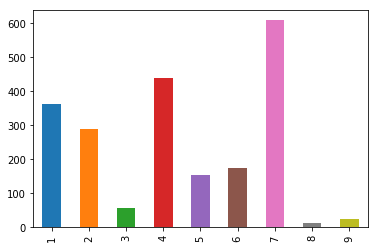

In [36]:
#visualizing train class distribution

train_class_distribution.plot(kind = 'bar')


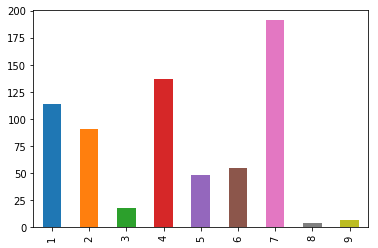

In [37]:
test_class_distribution.plot(kind='bar')

In [81]:
np.argsort?

In [38]:
sorted_yi = np.argsort(~train_class_distribution.values)

In [39]:
sorted_yi

array([6, 3, 0, 1, 5, 4, 2, 8, 7], dtype=int64)

In [40]:
for i in sorted_yi:
    print('Number of data points in class', i+1,':', train_class_distribution.values[i],"(", np.round((train_class_distribution.values[i])/train_df.shape[0]*100),")")

Number of data points in class 7 : 609 ( 29.0 )
Number of data points in class 4 : 439 ( 21.0 )
Number of data points in class 1 : 363 ( 17.0 )
Number of data points in class 2 : 289 ( 14.0 )
Number of data points in class 6 : 176 ( 8.0 )
Number of data points in class 5 : 155 ( 7.0 )
Number of data points in class 3 : 57 ( 3.0 )
Number of data points in class 9 : 24 ( 1.0 )
Number of data points in class 8 : 12 ( 1.0 )


### Model Building 

#### Evaluation Criteria = Log-loss 

### Generate a Random Model


In [41]:
np.random.rand(1,9)

array([[0.72668436, 0.52786707, 0.7655172 , 0.33225077, 0.86246493,
        0.89329013, 0.84655937, 0.02239957, 0.17074422]])

In [42]:
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]


In [43]:
cv_predicted_y = np.zeros((cv_data_len,9))

In [44]:
# this for loop runs 532 times

for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)*10000
    cv_predicted_y[i] = (rand_probs/np.sum(rand_probs))[0]
           
print("Log loss on CV data using Random Model ", log_loss(y_cv,cv_predicted_y,eps=1e-15))


Log loss on CV data using Random Model  2.4414028730516804


In [45]:
test_predicted_y = np.zeros((test_data_len,9))
# this for loop will run 665 times
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = (rand_probs/np.sum(rand_probs))[0]
    
print("Log loss on TEst data using Random Model ", log_loss(y_test,test_predicted_y,eps=1e-15))

Log loss on TEst data using Random Model  2.4811687898183084


In [46]:
print(test_predicted_y.shape)

(665, 9)


In [47]:
predicted_y = np.argmax(test_predicted_y,axis=1)
print(predicted_y.shape)

(665,)


In [48]:
predicted_y = predicted_y + 1 

In [49]:
C = confusion_matrix(y_test, predicted_y)
C

array([[18, 13, 12, 13,  9, 11, 10, 15, 13],
       [11, 10,  6, 15,  7, 11, 10, 12,  9],
       [ 3,  2,  4,  3,  1,  0,  2,  3,  0],
       [21, 18, 12, 14, 15, 15, 12, 17, 13],
       [ 2,  5,  3,  9,  4,  5,  8,  7,  5],
       [ 7,  0,  6,  9,  8,  7,  4,  6,  8],
       [18, 23, 19, 27, 25, 25, 14, 19, 21],
       [ 1,  0,  0,  2,  0,  0,  0,  1,  0],
       [ 3,  0,  1,  1,  0,  1,  0,  0,  1]], dtype=int64)

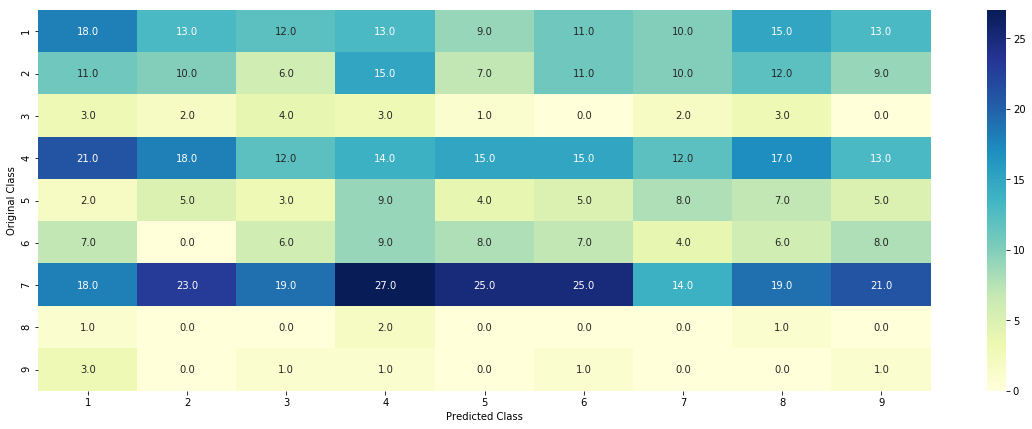

In [50]:
labels = [1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(20,7))
sns.heatmap(C, annot=True,cmap='YlGnBu', fmt=".1f", xticklabels=labels,yticklabels=labels)

plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [89]:
# Precision Matrix
B = (C/C.sum(axis=0))

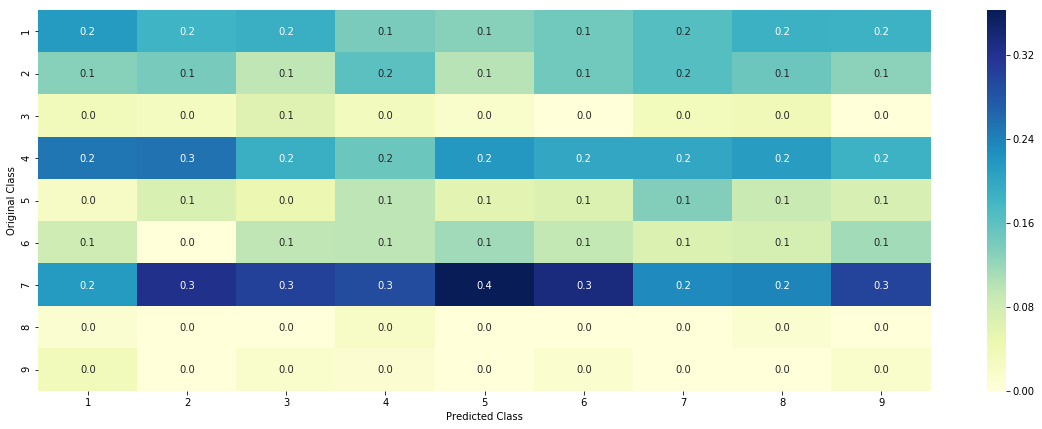

In [52]:
plt.figure(figsize=(20,7))
sns.heatmap(B, annot=True,cmap='YlGnBu', fmt=".1f", xticklabels=labels,yticklabels=labels)

plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

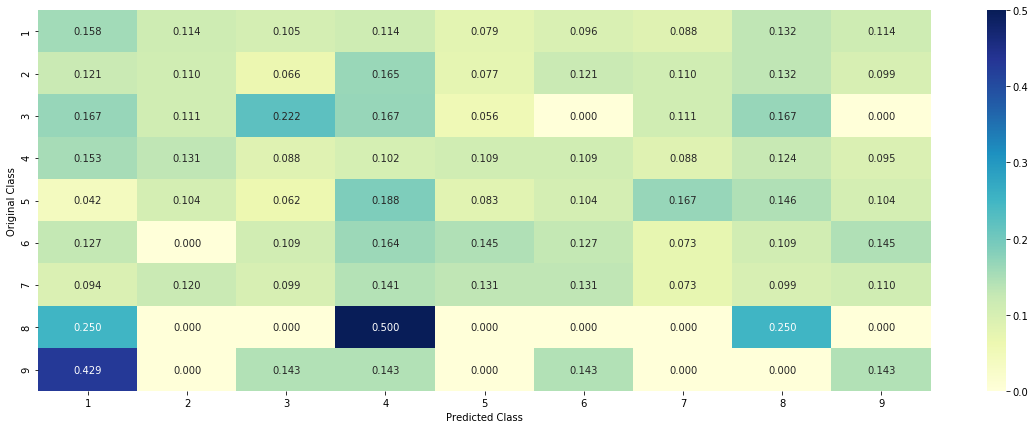

In [92]:
# Recall Matrix
R = (((C.T)/(C.sum(axis=1))).T)
plt.figure(figsize=(20,7))
sns.heatmap(R, annot=True,cmap='YlGnBu', fmt=".3f", xticklabels=labels,yticklabels=labels)

plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

## Evaluating 'Gene' Column


In [53]:
unique_genes = train_df['Gene'].value_counts()
print("number of unique genes:",unique_genes.shape[0])
unique_genes.head(22)

number of unique genes: 230


BRCA1     157
TP53      101
EGFR       91
PTEN       86
BRCA2      84
KIT        69
BRAF       48
ALK        47
ERBB2      46
PDGFRA     39
PIK3CA     38
CDKN2A     37
FGFR2      34
TSC2       34
FLT3       33
MAP2K1     31
KRAS       29
RET        28
MTOR       26
NOTCH1     25
VHL        24
JAK2       23
Name: Gene, dtype: int64

In [54]:
s = np.sum(unique_genes.values)
h = unique_genes.values/s
c = np.cumsum(h)


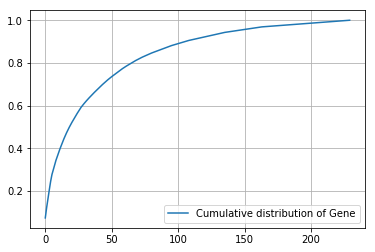

In [55]:
plt.plot(c, label = 'Cumulative distribution of Gene')
plt.grid()
plt.legend()
plt.show()

### How to deal with Categorical data - column?
#### 1. One-hot Encoding
#### 2. Response Encoding(mean imputation)

In [56]:
#one-hot encoding
gene_vectorizer = CountVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])


In [57]:
print(train_gene_feature_onehotCoding.shape)
print(test_gene_feature_onehotCoding.shape)
print(cv_gene_feature_onehotCoding.shape)

(2124, 229)
(665, 229)
(532, 229)


In [211]:
print(train_gene_feature_onehotCoding.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [58]:
import scipy
scipy.sparse.issparse(train_gene_feature_onehotCoding)

True

In [59]:
gene_vectorizer.get_feature_names()

['abl1',
 'acvr1',
 'ago2',
 'akt1',
 'akt2',
 'akt3',
 'alk',
 'apc',
 'ar',
 'araf',
 'arid1a',
 'arid2',
 'asxl1',
 'asxl2',
 'atm',
 'atr',
 'atrx',
 'aurka',
 'aurkb',
 'b2m',
 'bap1',
 'bard1',
 'bcl10',
 'bcl2',
 'bcl2l11',
 'bcor',
 'braf',
 'brca1',
 'brca2',
 'brip1',
 'btk',
 'card11',
 'carm1',
 'casp8',
 'cbl',
 'ccnd1',
 'ccnd2',
 'ccnd3',
 'ccne1',
 'cdh1',
 'cdk12',
 'cdk4',
 'cdk6',
 'cdk8',
 'cdkn1a',
 'cdkn1b',
 'cdkn2a',
 'cdkn2b',
 'cdkn2c',
 'chek2',
 'cic',
 'crebbp',
 'ctcf',
 'ctnnb1',
 'ddr2',
 'dicer1',
 'dnmt3a',
 'dnmt3b',
 'dusp4',
 'egfr',
 'eif1ax',
 'elf3',
 'ep300',
 'epas1',
 'erbb2',
 'erbb3',
 'erbb4',
 'ercc2',
 'ercc3',
 'ercc4',
 'erg',
 'esr1',
 'etv1',
 'etv6',
 'ewsr1',
 'ezh2',
 'fanca',
 'fat1',
 'fbxw7',
 'fgf19',
 'fgf3',
 'fgfr1',
 'fgfr2',
 'fgfr3',
 'fgfr4',
 'flt3',
 'foxa1',
 'foxl2',
 'foxo1',
 'foxp1',
 'gata3',
 'gli1',
 'gnaq',
 'gnas',
 'h3f3a',
 'hla',
 'hnf1a',
 'hras',
 'idh1',
 'idh2',
 'igf1r',
 'ikzf1',
 'inpp4b',
 'jak1',


In [60]:


value_count = train_df["Gene"].value_counts()
gv_dict = dict()
    
for i, denominator in value_count.items():
    print(i,denominator)

BRCA1 157
TP53 101
EGFR 91
PTEN 86
BRCA2 84
KIT 69
BRAF 48
ALK 47
ERBB2 46
PDGFRA 39
PIK3CA 38
CDKN2A 37
FGFR2 34
TSC2 34
FLT3 33
MAP2K1 31
KRAS 29
RET 28
MTOR 26
NOTCH1 25
VHL 24
JAK2 23
MET 23
ABL1 22
MLH1 22
SMAD4 21
FGFR3 21
CTNNB1 20
CBL 17
PDGFRB 16
RUNX1 16
ERCC2 15
PTPRT 15
NFE2L2 14
PIK3R1 14
MSH2 14
SMO 14
ROS1 13
TSC1 13
FBXW7 13
HRAS 13
PTPN11 13
IDH1 13
ERBB4 12
SMAD2 12
SMAD3 12
JAK1 12
SF3B1 11
AKT1 11
AR 11
SPOP 10
NF1 10
KEAP1 10
NTRK1 10
PMS2 10
STK11 10
ERBB3 10
CCND1 10
EP300 9
CARD11 9
TET2 9
PIK3CB 8
CDK12 8
EWSR1 8
POLE 8
CDH1 8
FGFR1 8
RAF1 8
FANCA 7
MSH6 7
NRAS 7
BAP1 7
PPP2R1A 7
MAP2K4 6
RHOA 6
TGFBR1 6
PIM1 6
RB1 6
DDR2 6
AKT2 6
ARAF 5
EPAS1 5
ESR1 5
NF2 5
FOXA1 5
ATM 5
MAP2K2 5
BRIP1 5
PIK3R2 5
STAT3 5
CDKN2B 5
CHEK2 5
DICER1 5
KDR 5
SOX9 5
AKT3 4
B2M 4
ETV6 4
CASP8 4
CCND3 4
TERT 4
CTCF 4
RAC1 4
PTPRD 4
MAP3K1 4
TGFBR2 4
ERG 4
CREBBP 4
NUP93 3
MYC 3
PPP6C 3
RIT1 3
CDKN1B 3
EZH2 3
PBRM1 3
MED12 3
IDH2 3
IGF1R 3
NTRK2 3
GNAS 3
KDM5C 3
RASA1 3
KMT2C 3
YAP1 3
H

In [61]:
train_df

,ID,Gene,Variation,Class,TEXT
1640,1640,FLT3,FLT3_internal_tandem_duplications,7,internal tandem duplications fms like tyrosine...
259,259,EGFR,S464L,2,accurate determination perfluoroalkyl substanc...
2320,2320,JAK2,D544H,6,myeloproliferative neoplasms mpns group hemato...
63,63,PTPRT,Q984K,4,tyrosine phosphorylation regulated protein tyr...
2618,2618,BRCA1,C1787S,5,abstract brca1 gene individuals risk breast ov...
860,860,ABL1,F317L,2,abstract mutations bcr abl kinase domain may c...
2167,2167,PTEN,T131L,4,pten phosphatase tensin homolog phosphatase un...
3278,3278,RET,A883F,7,ret single pass transmembrane receptor tyrosin...
2211,2211,PTEN,A126D,4,pten phosphatase tensin homolog phosphatase un...
2540,2540,BRCA1,K65M,6,germline mutations breast cancer 1 brca1 gene ...


### Respone Encoding


In [62]:
def get_gv_fea_dict(alpha,feature,df):
    value_count = train_df[feature].value_counts()
    gv_dict = dict()
    
    for i, denominator in value_count.items():
        vec = []
        for k in range(1,10):
            cls_cnt = train_df.loc[(train_df['Class']==k)& (train_df[feature]==i)]
            if i == 'RB1':
                print(cls_cnt.shape)
            vec.append((cls_cnt.shape[0] + alpha*10)/(denominator + 90*alpha))
        
        gv_dict[i] = vec
    return gv_dict


def get_gv_feature(alpha, feature, df):
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    
    value_count = train_df[feature].value_counts()
    
    gv_fea = []
    
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
    return gv_fea

In [63]:
alpha = 1

train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha,"Gene",test_df))
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha,"Gene",cv_df))

                                             

(4, 5)
(0, 5)
(0, 5)
(0, 5)
(1, 5)
(1, 5)
(0, 5)
(0, 5)
(0, 5)
(4, 5)
(0, 5)
(0, 5)
(0, 5)
(1, 5)
(1, 5)
(0, 5)
(0, 5)
(0, 5)
(4, 5)
(0, 5)
(0, 5)
(0, 5)
(1, 5)
(1, 5)
(0, 5)
(0, 5)
(0, 5)


In [64]:
print(train_gene_feature_responseCoding)

[[0.08130081 0.11382114 0.12195122 ... 0.27642276 0.08130081 0.08130081]
 [0.06077348 0.20994475 0.05524862 ... 0.37016575 0.05524862 0.05524862]
 [0.08849558 0.11504425 0.08849558 ... 0.16814159 0.08849558 0.08849558]
 ...
 [0.31937173 0.06282723 0.05759162 ... 0.05235602 0.05235602 0.05759162]
 [0.13043478 0.10869565 0.10869565 ... 0.10869565 0.10869565 0.10869565]
 [0.0729927  0.10218978 0.12408759 ... 0.29927007 0.0729927  0.0729927 ]]


In [65]:
# Hyperparameter for SGD Classifier
alpha = [10**x for x in range(-5,1)]

In [66]:
print(alpha)

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1]


In [67]:
cv_log_error_array = []

for i in alpha:
    clf = SGDClassifier(alpha = i, penalty='l2', loss = 'log', random_state=42)    
    clf.fit(train_gene_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method ='sigmoid')
    sig_clf.fit(train_gene_feature_onehotCoding, y_train)
    
    predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    
    
    cv_log_error_array.append(log_loss(y_cv, predict_y,labels=clf.classes_, eps=1e-15))
    
    print('For values of alpha = ', i , " log loss=",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

    

For values of alpha =  1e-05  log loss= 1.3843415157750874
For values of alpha =  0.0001  log loss= 1.2062164276240444
For values of alpha =  0.001  log loss= 1.2240404306618506
For values of alpha =  0.01  log loss= 1.3331388510266775
For values of alpha =  0.1  log loss= 1.4342045163948534
For values of alpha =  1  log loss= 1.4671073461235542


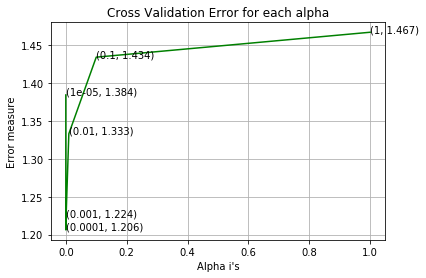

In [68]:
 # Lets plot the same to check the best Alpha value
fig,ax = plt.subplots()

ax.plot(alpha, cv_log_error_array, c='g')
for i,txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i], np.round(txt,3)),(alpha[i], cv_log_error_array[i]) )

plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [69]:
# Lets use best alpha

best_alpha = np.argmin(cv_log_error_array)

clf = SGDClassifier(alpha = alpha[best_alpha], penalty='l2', loss = 'log', random_state=42)    
clf.fit(train_gene_feature_onehotCoding, y_train)
    
sig_clf = CalibratedClassifierCV(clf, method ='sigmoid')
sig_clf.fit(train_gene_feature_onehotCoding, y_train)
    
predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)    

print('For values of alpha = ', alpha[best_alpha] , " train log loss=",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding) 
print('For values of alpha = ',  alpha[best_alpha] , " cv log loss=",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding) 
print('For values of alpha = ',  alpha[best_alpha] , " test log loss=",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For values of alpha =  0.0001  train log loss= 1.0308083412132132
For values of alpha =  0.0001  cv log loss= 1.2062164276240444
For values of alpha =  0.0001  test log loss= 1.266582176162222


#### Model stabilty 

In [70]:
test_coverage = test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
cv_coverage = cv_df[cv_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]


In [71]:
print('1. In test data', test_coverage,'out of', test_df.shape[0],":",(test_coverage/test_df.shape[0])*100)
print('2. In CV data', cv_coverage,'out of', cv_df.shape[0],":",(cv_coverage/cv_df.shape[0])*100)


1. In test data 643 out of 665 : 96.69172932330827
2. In CV data 514 out of 532 : 96.61654135338345


### Evaluating Variation column 

In [72]:
unique_variations = train_df['Variation'].value_counts()
print("number of unique genes:",unique_variations.shape[0])
unique_variations.head(10)

number of unique genes: 1936


Truncating_Mutations    53
Deletion                52
Amplification           39
Fusions                 23
G12V                     4
Overexpression           3
G67R                     2
T286A                    2
Q61H                     2
R841K                    2
Name: Variation, dtype: int64

In [74]:
s = np.sum(unique_variations.values)
h = unique_variations.values/s
c = np.cumsum(h)

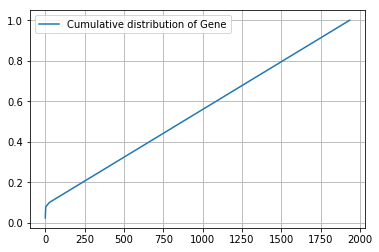

In [75]:
plt.plot(c, label = 'Cumulative distribution of Gene')
plt.grid()
plt.legend()
plt.show()

In [76]:
#one-hot encoding
variation_vetorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vetorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vetorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vetorizer.transform(cv_df['Variation'])

In [77]:
print(train_variation_feature_onehotCoding.shape)
print(test_variation_feature_onehotCoding.shape)

(2124, 1968)
(665, 1968)


In [78]:
print(train_variation_feature_onehotCoding)

  (0, 536)	1
  (1, 1629)	1
  (2, 257)	1
  (3, 1320)	1
  (4, 135)	1
  (5, 499)	1
  (6, 1680)	1
  (7, 94)	1
  (8, 23)	1
  (9, 866)	1
  (10, 1582)	1
  (11, 1751)	1
  (12, 428)	1
  (13, 394)	1
  (14, 1089)	1
  (15, 1600)	1
  (16, 154)	1
  (17, 220)	1
  (18, 324)	1
  (19, 1252)	1
  (20, 935)	1
  (21, 1751)	1
  (22, 213)	1
  (23, 928)	1
  (24, 1133)	1
  :	:
  (2100, 1208)	1
  (2101, 276)	1
  (2102, 1039)	1
  (2103, 49)	1
  (2104, 480)	1
  (2105, 1540)	1
  (2105, 104)	1
  (2106, 309)	1
  (2107, 79)	1
  (2108, 1924)	1
  (2109, 1010)	1
  (2110, 881)	1
  (2111, 300)	1
  (2112, 804)	1
  (2113, 1091)	1
  (2114, 329)	1
  (2115, 1751)	1
  (2116, 162)	1
  (2117, 175)	1
  (2118, 282)	1
  (2119, 1611)	1
  (2120, 1923)	1
  (2121, 948)	1
  (2122, 1397)	1
  (2123, 22)	1


In [79]:
alpha = 1

train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha,"Variation",test_df))
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha,"Variation",cv_df))


In [80]:
train_variation_feature_responseCoding.shape

(2124, 9)

In [81]:
# Hyperparameter for SGD Classifier
alpha = [10**x for x in range(-5,1)]


In [82]:
y_train

array([7, 2, 6, ..., 4, 1, 5], dtype=int64)

In [83]:

clf = SGDClassifier(alpha = 0.01, penalty='l2', loss = 'log', random_state=42)    
clf.fit(train_variation_feature_onehotCoding, y_train)
predict_sgd_y = clf.predict(cv_variation_feature_onehotCoding)
print(predict_sgd_y.shape)
print(predict_sgd_y)


sig_clf = CalibratedClassifierCV(clf, method ='sigmoid')
sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    
predict_y = sig_clf.predict(cv_variation_feature_onehotCoding)
print(predict_y.shape)
print(predict_y)

(532,)
[7 7 1 7 7 7 7 1 1 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 1 7 7 7 7 7 7
 7 7 7 7 7 7 1 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 1 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 2 7 7 7 7 7 7 7 7 7
 7 7 1 7 7 7 7 7 7 7 7 2 7 1 7 7 7 7 7 7 7 7 7 7 1 1 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 1 7 7 7 2 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 2 7 7 7 7 7 7 7 7 1 7 7 7 7 1 7 1 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 2 7 7 1 7 7 7 7 7 7 7 7 7 7 7 1 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 1 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 1 7 7 7 7 7 1 7 7 7 7 7 7 1 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 1 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 1 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 1 7 7

In [84]:
cv_log_error_array = []

for i in alpha:
    clf = SGDClassifier(alpha = i, penalty='l2', loss = 'log', random_state=42)    
    clf.fit(train_variation_feature_onehotCoding, y_train)
       
    sig_clf = CalibratedClassifierCV(clf, method ='sigmoid')
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    
    cv_log_error_array.append(log_loss(y_cv, predict_y,labels=clf.classes_, eps=1e-15))
    
    print('For values of alpha = ', i , " log loss=",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

    

For values of alpha =  1e-05  log loss= 1.721472104077404
For values of alpha =  0.0001  log loss= 1.7103179317347528
For values of alpha =  0.001  log loss= 1.706716495653258
For values of alpha =  0.01  log loss= 1.7229546406053335
For values of alpha =  0.1  log loss= 1.7382201962233974
For values of alpha =  1  log loss= 1.7403938164698658


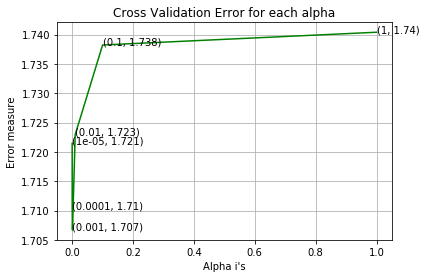

In [85]:
 # Lets plot the same to check the best Alpha value
fig,ax = plt.subplots()

ax.plot(alpha, cv_log_error_array, c='g')
for i,txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i], np.round(txt,3)),(alpha[i], cv_log_error_array[i]) )

plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [86]:
# Lets use best alpha

best_alpha = np.argmin(cv_log_error_array)

clf = SGDClassifier(alpha = alpha[best_alpha], penalty='l2', loss = 'log', random_state=42)    
clf.fit(train_variation_feature_onehotCoding, y_train)
    
sig_clf = CalibratedClassifierCV(clf, method ='sigmoid')
sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    
predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)    

print('For values of alpha = ', alpha[best_alpha] , " train log loss=",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding) 
print('For values of alpha = ',  alpha[best_alpha] , " cv log loss=",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding) 
print('For values of alpha = ',  alpha[best_alpha] , " test log loss=",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For values of alpha =  0.001  train log loss= 1.0053166685467876
For values of alpha =  0.001  cv log loss= 1.706716495653258
For values of alpha =  0.001  test log loss= 1.6977820566326414


In [87]:
test_coverage = test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
cv_coverage = cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]


In [88]:
print('1. In test data', test_coverage,'out of', test_df.shape[0],":",(test_coverage/test_df.shape[0])*100)
print('2. In CV data', cv_coverage,'out of', cv_df.shape[0],":",(cv_coverage/cv_df.shape[0])*100)


1. In test data 76 out of 665 : 11.428571428571429
2. In CV data 54 out of 532 : 10.150375939849624


## Evaluating TEXT column


In [95]:
def extract_dictionary(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] += 1
    return dictionary

In [96]:
# getting Response encoding
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10)/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [204]:
# getting One Hot Encoding
text_vectorizer = CountVectorizer(min_df=3)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])

train_text_features = text_vectorizer.get_feature_names()

train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

text_fea_dict = dict(zip(list(train_text_features), train_text_fea_counts))

print("Total number of unique words in train data: ", len(train_text_features))


Total number of unique words in train data:  52606


In [205]:
print(train_text_feature_onehotCoding.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [213]:
print(train_text_fea_counts)

[2539 5589    9 ...    7    6   21]


In [212]:
print(text_vectorizer.get_feature_names())

['00', '000', '0000001', '000001', '000002', '000007', '00001', '000011', '000012', '000017', '00002644', '000044', '00005', '000059', '000077', '00008', '00009', '0001', '000132', '00014', '000141', '000148', '00016', '000179', '000182', '0002', '0002158', '00023490', '000245', '000249', '000251', '000258', '000264', '000267', '00029', '0003', '00034', '000369266', '00037', '0004', '0005', '000535', '000548', '000588', '0006', '0007', '0008', '00088', '0009', '00092', '000g', '000xg', '001', '0010', '0011', '001172713', '0012', '001210', '001269551', '0013', '0014', '001429', '0015', '00151612', '0016', '001635', '0018', '001810', '0019', '001987', '001a', '001acd4', '001acd8', '001bathe', '001bimmunophenotypecd34', '001blyl1', '002', '002078', '0021', '002168', '0022', '0023', '0024', '0025', '0025021', '0026', '002648', '0027', '002755', '0028', '002880', '00299804', '002a', '003', '0030', '003008', '0030485', '003133', '0032', '0032555', '0033', '003333', '00333382', '00339757', '0

In [206]:
print(train_text_feature_onehotCoding.shape)

(2124, 52606)


In [207]:
dict_list =[]

for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    
    dict_list.append(extract_dictionary(cls_text))
    
total_dict = extract_dictionary(train_df)




confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10)/(total_dict[i]+90))
        
    confuse_array.append(ratios)

confuse_array = np.array(confuse_array)




In [208]:
confuse_array.shape

(52606, 9)

In [209]:
# response coding of text features
train_text_features_responseCoding = get_text_responsecoding(train_df)


In [108]:
test_text_features_responseCoding = get_text_responsecoding(test_df)
cv_text_features_responseCoding = get_text_responsecoding(cv_df)

In [177]:
# normalize every features
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)



print(train_text_feature_onehotCoding.shape)
print(test_text_feature_onehotCoding.shape)

(2124, 52606)
(665, 52606)


In [178]:
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key= lambda x: x[1], reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [179]:
print(Counter(sorted_text_occur))

Counter({3: 4955, 4: 3893, 5: 2691, 6: 2326, 7: 2123, 8: 2051, 9: 1900, 10: 1335, 12: 1282, 11: 1150, 14: 1144, 16: 956, 18: 784, 13: 759, 15: 710, 22: 561, 23: 556, 17: 542, 24: 534, 21: 523, 20: 514, 19: 491, 28: 374, 25: 374, 26: 369, 43: 346, 30: 326, 44: 318, 27: 318, 29: 304, 32: 300, 36: 268, 31: 262, 34: 256, 35: 245, 33: 231, 37: 228, 40: 225, 38: 213, 45: 200, 52: 197, 39: 192, 48: 188, 42: 183, 41: 166, 49: 164, 51: 163, 46: 162, 50: 161, 54: 144, 47: 142, 56: 139, 64: 132, 55: 132, 66: 129, 63: 129, 60: 125, 62: 123, 57: 122, 59: 120, 68: 117, 53: 114, 58: 112, 86: 105, 72: 105, 61: 103, 70: 100, 65: 100, 67: 93, 88: 90, 71: 85, 78: 83, 74: 83, 79: 82, 80: 80, 77: 78, 69: 77, 89: 76, 84: 76, 76: 76, 95: 70, 91: 70, 82: 70, 96: 69, 81: 69, 101: 67, 75: 67, 104: 66, 90: 65, 73: 65, 87: 63, 83: 63, 102: 62, 85: 62, 116: 57, 98: 57, 103: 54, 97: 54, 93: 54, 107: 53, 120: 52, 92: 52, 112: 51, 99: 51, 108: 49, 94: 49, 126: 48, 106: 47, 136: 46, 129: 46, 115: 46, 105: 46, 118: 45,

### Data Preparation for Machine Learning models


In [143]:
def report_log_loss(train_x, train_y, test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)


In [144]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A = (((C.T)/(C.sum(axis=1))).T)
    
    B = (C/C.sum(axis=0))
    
    labels = [1,2,3,4,5,6,7,8,9]
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True,cmap='YlGnBu', fmt=".3f", xticklabels=labels,yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    
    print("-"*20, "Precision matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True,cmap='YlGnBu', fmt=".3f", xticklabels=labels,yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    
    print("-"*20, "Recall matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True,cmap='YlGnBu', fmt=".3f", xticklabels=labels,yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
def predict_and_plot_confusion_matrix(train_x, train_y, test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)
    
    print("Log loss: ", log_loss(test_y, sig_clf.predict_proba(test_x)))
    
    print("Number of mis-classified points : ", np.count_nonzero((pred_y - test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)
    

In [198]:
print(train_text_feature_onehotCoding.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00372324 0.         ... 0.         0.         0.        ]]


### Combining all 3 features together 

In [182]:
### onehotCoding

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding, train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding, test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding, cv_variation_feature_onehotCoding))

print(train_gene_var_onehotCoding.shape)
print(train_text_feature_onehotCoding.shape)
# train
train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding))
train_y = np.array(list(train_df['Class']))
# test
test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding))
test_y = np.array(list(test_df['Class']))
# cv
cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding))
cv_y = np.array(list(cv_df['Class']))

(2124, 2197)
(2124, 52606)


In [183]:
### responseCoding

train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding, train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding, test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding, cv_variation_feature_responseCoding))

# train
train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_features_responseCoding))

# test
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_features_responseCoding))

# cv
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_features_responseCoding))


In [184]:
print("One hot encoding features: ")
print("shape train data: ", train_x_onehotCoding.shape)
print("shape test data: ", test_x_onehotCoding.shape)
print("shape cv data: ", cv_x_onehotCoding.shape)


One hot encoding features: 
shape train data:  (2124, 54803)
shape test data:  (665, 54803)
shape cv data:  (532, 54803)


In [202]:
print(cv_x_onehotCoding.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [199]:
print("Response encoding features: ")
print("shape train data: ", train_x_responseCoding.shape)
print("shape test data: ", test_x_responseCoding.shape)
print("shape cv data: ", cv_x_responseCoding.shape)


Response encoding features: 
shape train data:  (2124, 27)
shape test data:  (665, 27)
shape cv data:  (532, 27)


### Naive Bayes 

In [210]:
alpha = [0.0001, 0.0001, 0.001,0.1,1,10,100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha = ",i)
    clf = MultinomialNB(alpha = i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels = clf.classes_))
    print("Log Loss: ", log_loss(cv_y, sig_clf_probs))

for alpha =  0.0001
Log Loss:  1.2634895042371812
for alpha =  0.0001
Log Loss:  1.2634895042371812
for alpha =  0.001
Log Loss:  1.2661813421101387
for alpha =  0.1
Log Loss:  1.2420095636705766
for alpha =  1
Log Loss:  1.2741436253893603
for alpha =  10
Log Loss:  1.3742800219379612
for alpha =  100
Log Loss:  1.3389460877766783
for alpha =  1000
Log Loss:  1.2556293637443754


In [214]:
best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha = alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For best alpha = ', alpha[best_alpha]," train log-loss=", log_loss(train_y, predict_y))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For best alpha = ', alpha[best_alpha]," cross log-loss=", log_loss(cv_y, predict_y))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For best alpha = ', alpha[best_alpha]," train log-loss=", log_loss(test_y, predict_y))


For best alpha =  0.1  train log-loss= 0.8821382622323778
For best alpha =  0.1  cross log-loss= 1.2420095636705766
For best alpha =  0.1  train log-loss= 1.2851706591608323


In [ ]:
print("Number of misclassified point: ", np.count_nonzero((pred_y - test_y))/test_y.shape[0])